In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

np.random.seed(35)

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, '5')

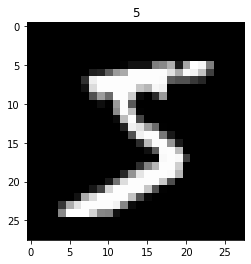

In [23]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])

In [24]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [25]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [26]:
#shuffle the training set
for _ in range(5): 
    indexes = np.random.permutation(len(X_train))
    
X_train = X_train[indexes]
Y_train = Y_train[indexes]

#set aside 10,000 for validation
val_images = X_train[:10000,:]
val_labels = Y_train[:10000,:]

# leave rest in training set
train_images = X_train[10000:,:]
train_labels = Y_train[10000:,:]

train_images.shape, val_images.shape

((50000, 784), (10000, 784))

In [27]:
model = Sequential()

model.add(Dense(512, input_dim=784))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
model.add(Activation('relu'))
# Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128,
             validation_data=(val_images, val_labels))

Epoch 1/5
391/391 [==============================] - 5s 12ms/step - loss: 0.5032 - accuracy: 0.8439 - val_loss: 0.1248 - val_accuracy: 0.9618
Epoch 2/5
391/391 [==============================] - 5s 12ms/step - loss: 0.1187 - accuracy: 0.9634 - val_loss: 0.1025 - val_accuracy: 0.9694
Epoch 3/5
391/391 [==============================] - 5s 12ms/step - loss: 0.0831 - accuracy: 0.9731 - val_loss: 0.1018 - val_accuracy: 0.9719
Epoch 4/5
391/391 [==============================] - 5s 12ms/step - loss: 0.0644 - accuracy: 0.9796 - val_loss: 0.0894 - val_accuracy: 0.9753
Epoch 5/5
391/391 [==============================] - 4s 11ms/step - loss: 0.0526 - accuracy: 0.9836 - val_loss: 0.0964 - val_accuracy: 0.9726


In [30]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']


In [31]:
epochs = range(1, len(history.history['loss']) + 1)

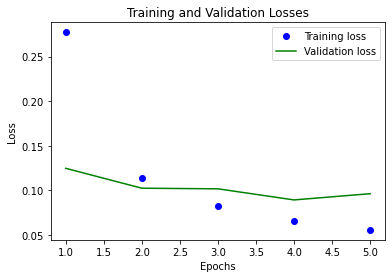

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.savefig('results/6_1_lossplot.png')

In [33]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


In [34]:
epochs = range(1, len(history.history['accuracy']) + 1)

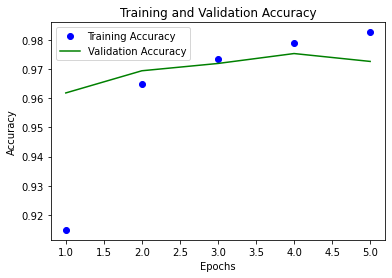

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
plt.savefig('results/6_1_accuracyplot.png')

In [40]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0862 - accuracy: 0.9760

Test accuracy:  0.9760000109672546


In [49]:
predictions = np.argmax(model.predict(X_test), axis=1)

predictions = list(predictions)
actuals = list(y_test)

pred_res = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
pred_res.to_csv('results/6_1_predictions.csv', index=False)
print (pred_res)

      Actual  Predictions
0          7            7
1          2            2
2          1            1
3          0            0
4          4            4
...      ...          ...
9995       2            2
9996       3            3
9997       4            4
9998       5            5
9999       6            6

[10000 rows x 2 columns]


In [50]:
# save model
model.save('results/6_1_model.h5')

In [51]:
#Metrics output
with open('results/6_1_metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['accuracy'])))
    f.write('\nTest Loss: {}'.format(score[0]))
    f.write('\nTest Accuracy: {}'.format(score[1]))